In [1]:
import numpy
import skimage.io

import ivvv

In [7]:
image = skimage.io.imread("AICS-10_5_5.ome.tif")

image = numpy.transpose(image, [0, 2, 3, 1])
image.shape

(65, 494, 306, 9)

In [8]:
def resize(image, output_shape):
    response = numpy.zeros((image.shape[0], *output_shape))

    for index, image in enumerate(image):
        response[index] = skimage.transform.resize(image, output_shape, mode="reflect")

    return response

def resize_volume(image, output_shape):
    channels = image.shape[-1]

    output_shape = (256, 256)

    response = numpy.zeros((image.shape[0], *output_shape, channels))

    for channel_index in range(channels):
        response[..., channel_index] = resize(image[..., channel_index], output_shape)
        
    return response

In [9]:
example = image

In [5]:
resize_volume(image, (256, 256)).shape

(65, 256, 256, 9)

In [6]:
response.shape

NameError: name 'response' is not defined

C:\Users\dmt\Anaconda3\envs\aicsimageio\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


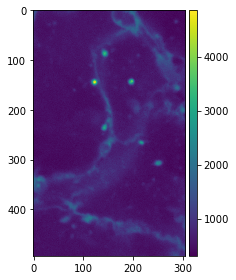

In [10]:
skimage.io.imshow(image[10, :, :, 0])

# (1.0, 0.41295546558704455, 0.954248366013072, 1.0)

In [12]:
ivvv.volshow(image, size=(512, 512), spacing=(1.0, 1.0, 4.0))

interactive(children=(FloatSlider(value=0.1, description='density', max=1.0), Output()), _dom_classes=('widget…

interactive(children=(FloatSlider(value=1.0, description='brightness', max=1.0), Output()), _dom_classes=('wid…

VolumeWidget(brightness=1.0, dimensions={'tile_width': 292, 'tile_height': 204, 'rows': 10, 'cols': 7, 'atlas_…